In [84]:
import pandas as pd

In [85]:
import numpy as np

In [86]:
data=pd.read_csv('pimaindians.csv')

In [87]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    data, test_size=0.2, random_state=42)

In [88]:
data.loc[data['test']==1,'test']=1

In [89]:
data.loc[data['test']==-1,'test']=0

In [90]:
data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [91]:
train_set_labels = train_set["test"].copy()
train_set = train_set.drop("test", axis=1)

test_set_labels = test_set["test"].copy()
test_set = test_set.drop("test", axis=1)

In [92]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [93]:
df = pd.DataFrame(data=train_set_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.873239,0.767442,0.339286,0.091346,0.359833,0.098073,0.233333
1,0.200000,0.176056,0.720930,0.160714,0.062500,0.171548,0.094647,0.016667
2,0.533333,0.492958,0.744186,0.517857,0.112981,0.401674,0.113062,0.466667
3,0.133333,0.281690,0.511628,0.107143,0.042067,0.037657,0.240685,0.083333
4,0.200000,0.169014,0.674419,0.428571,0.067308,0.311715,0.516916,0.100000


In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
models= []

In [96]:
models.append(('DTR', DecisionTreeRegressor()))

In [97]:
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

In [98]:
from sklearn import model_selection

In [99]:
data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [103]:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
       DecisionTreeRegressor(), X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print(names)
    #print(results)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

DTR: 0.716230 (0.122705)


In [104]:
                                        ####binary tree classifier####

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [107]:
print("Dataset Length:: ", len(data))
print("Dataset Shape:: ",data.shape)

Dataset Lenght::  392
Dataset Shape::  (392, 9)


In [108]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [114]:
!pip install graphviz

In [135]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

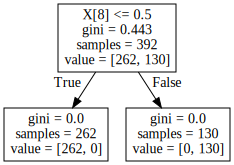

In [136]:
import graphviz 
clf=tree.DecisionTreeClassifier()
clf = clf.fit(data,data.test)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
print(graph)
graph

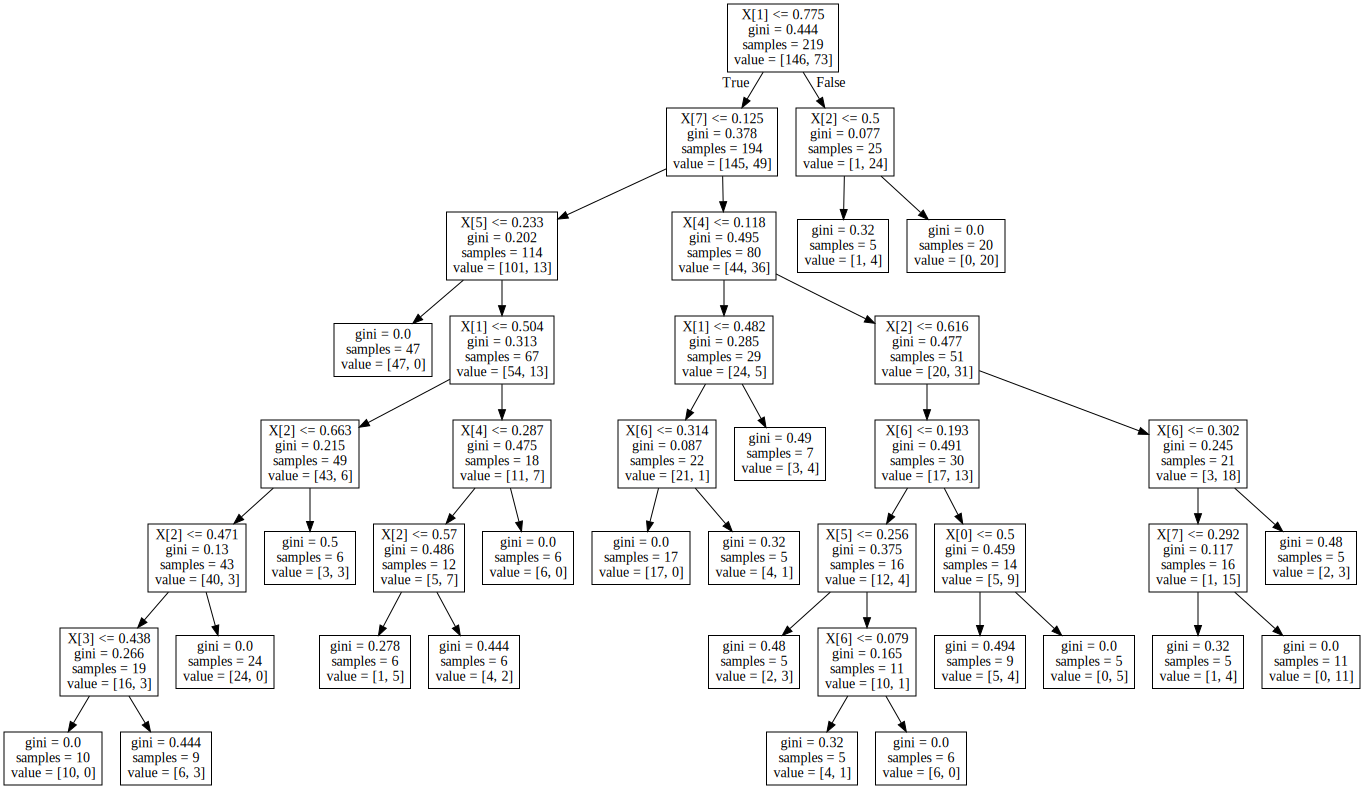

In [142]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=100, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_gini, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("data1")
graph

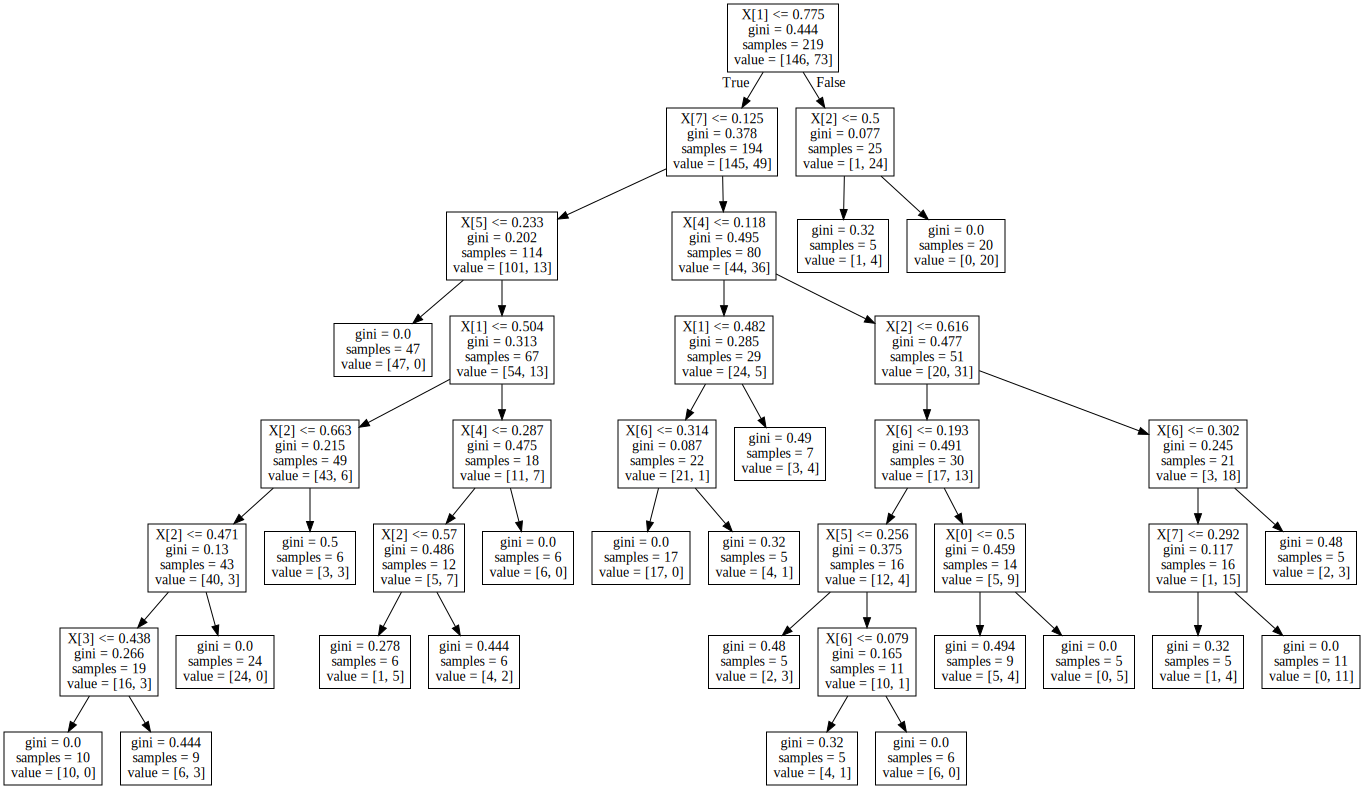

In [145]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=14, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_gini, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("data2")
graph